In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import math

In [2]:
titanic_dataset = pd.read_csv("https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv")

In [3]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [5]:
titanic_dataset.shape

(891, 12)

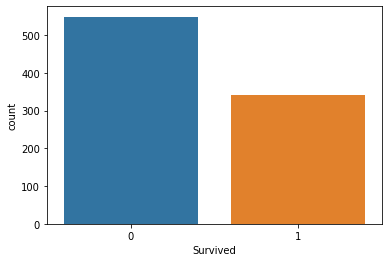

In [6]:
sns.countplot("Survived", data=titanic_dataset)

In [7]:
titanic_dataset.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

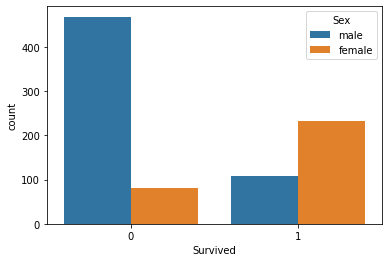

In [8]:
sns.countplot("Survived", hue="Sex", data=titanic_dataset)

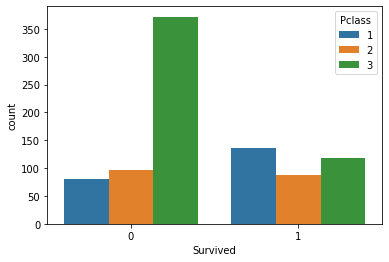

In [9]:
sns.countplot("Survived", hue="Pclass", data=titanic_dataset)

In [10]:
titanic_dataset.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

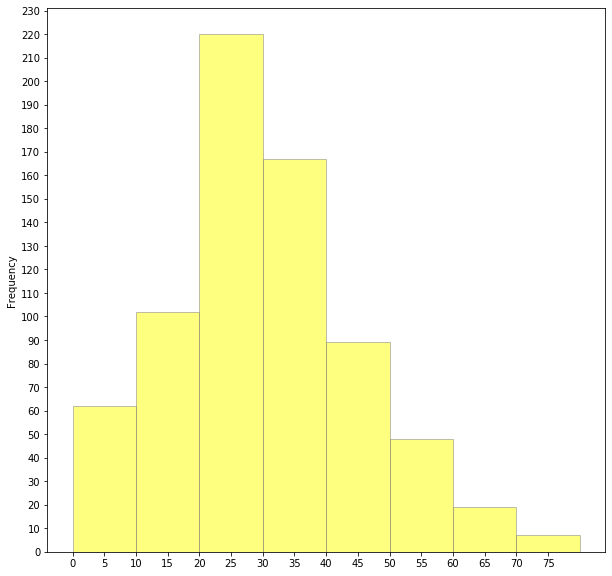

In [13]:
from matplotlib import pyplot as plt
plt.xticks(range(0,80,5))
plt.yticks(range(0,300,10))
titanic_dataset["Age"].plot.hist(bins=[0,10,20,30,40,50,60,70,80], 
                                 figsize=(10,10), alpha=0.5, facecolor="yellow", edgecolor="gray")

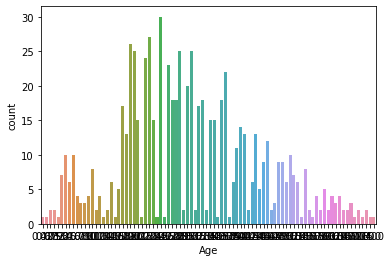

In [16]:
sns.countplot("Age", data = titanic_dataset)   # does not give the right data.. hence use bins as above

In [18]:
len(titanic_dataset[(titanic_dataset["Age"] <70) & (titanic_dataset["Age"] >=60)])

19

In [19]:
titanic_dataset.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
age_under_5_bucket = [x for x in titanic_dataset.Age if x <=5 and x >=0]

In [21]:
len(age_under_5_bucket)

44

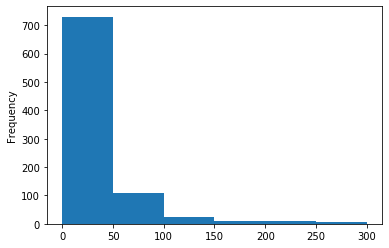

In [23]:
titanic_dataset["Fare"].plot.hist(bins = [0,50,100,150,200,250,300])

In [24]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


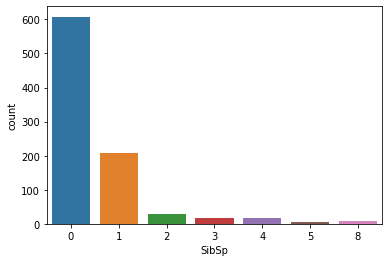

In [25]:
sns.countplot("SibSp", data=titanic_dataset)

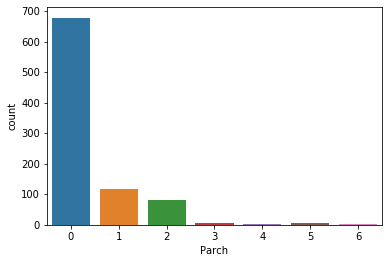

In [26]:
sns.countplot("Parch", data=titanic_dataset)

In [12]:
titanic_dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [27]:
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
titanic_dataset.drop("Cabin", axis=1, inplace=True)

In [29]:
titanic_dataset.dropna(inplace=True)

In [30]:
titanic_dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
titanic_dataset.Survived.unique() # categorical data and this is the target variable.. Therefore we can apply logistic regression

array([0, 1], dtype=int64)

In [33]:
titanic_dataset.shape

(712, 11)

In [39]:
titanic_dataset.Sex.value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [40]:
titanic_dataset.Sex.unique()

array(['male', 'female'], dtype=object)

In [17]:
titanic_dataset.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [43]:
sex = pd.get_dummies(titanic_dataset["Sex"], drop_first=True)
sex.head(10)

,male
0,1
1,0
2,0
3,0
4,1
6,1
7,1
8,0
9,0
10,0


In [49]:
embark = pd.get_dummies(titanic_dataset["Embarked"], drop_first=True)
embark.head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
6,0,1
7,0,1
8,0,1
9,0,0
10,0,1


In [48]:
titanic_dataset.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [51]:
pcl = pd.get_dummies(titanic_dataset["Pclass"], drop_first=True)
pcl.head(10)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
6,0,0
7,0,1
8,0,1
9,1,0
10,0,1


In [52]:
titanic_dataset = pd.concat([titanic_dataset, sex, embark, pcl], axis=1)

In [53]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [54]:
titanic_dataset.drop(["PassengerId", "Name", "Sex", "Pclass", "Ticket", "Embarked"], axis=1, inplace=True)

In [55]:
titanic_dataset.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [56]:
X = titanic_dataset.drop(["Survived"], axis=1)
y = titanic_dataset["Survived"]

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=444)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression()

In [62]:
X_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
816,23.0,0,0,7.9250,0,0,1,0,1
285,33.0,0,0,8.6625,1,0,0,0,1
675,18.0,0,0,7.7750,1,0,1,0,1
741,36.0,1,0,78.8500,1,0,1,0,0
493,71.0,0,0,49.5042,1,0,0,0,0
677,18.0,0,0,9.8417,0,0,1,0,1
534,30.0,0,0,8.6625,0,0,1,0,1
567,29.0,0,4,21.0750,0,0,1,0,1
847,35.0,0,0,7.8958,1,0,0,0,1
418,30.0,0,0,13.0000,1,0,1,1,0


In [63]:
model.fit(X_train, y_train)

C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
predictions = model.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.87      0.83       138\n           1       0.72      0.61      0.66        76\n\n    accuracy                           0.78       214\n   macro avg       0.76      0.74      0.75       214\nweighted avg       0.77      0.78      0.77       214\n'

In [67]:
y_test.value_counts()

0    138
1     76
Name: Survived, dtype: int64

In [69]:
from collections import Counter   #Alternate method to find the countb
Counter(predictions)

Counter({1: 64, 0: 150})

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[120,  18],
       [ 30,  46]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7757009345794392

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=444)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)  # increase in accuracy due to normalization

C:\Users\Dell\Anaconda3new\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.780373831775701